<a href="https://colab.research.google.com/github/QaziSaim/Data-Insight-And-Analysis/blob/main/Data_Insights_day_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring the Penguins Dataset with Pandas, NumPy, Seaborn, and Matplotlib**

  <h5>

  In this notebook, we will analyze the **Palmer Penguins dataset** using Python libraries such as **Pandas, NumPy, Seaborn, and Matplotlib**. We will perform various data exploration tasks, including checking unique species, identifying correlations, visualizing distributions, and applying **linear regression** to predict body mass from flipper length.
  </h5>



# **1. Load Required Libraries and Dataset**


In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# **2. Understanding the Dataset**

In [5]:
penguins = sns.load_dataset("penguins")
penguins.head()  # Display the first few rows

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

#  **3. Unique Species in the Dataset**

In [4]:
len(penguins['species'].unique())

3

In [6]:
penguins['species'].nunique()

3

# **4. Average Bill Length for Each Species**

In [7]:
penguins['bill_length_mm'].mean()

np.float64(43.9219298245614)

In [18]:
penguins[['species','bill_length_mm']].groupby(['species']).mean()

,bill_length_mm
species,
Adelie,38.791391
Chinstrap,48.833824
Gentoo,47.504878


# **5. Highest Average Flipper Length Among Species**

In [19]:
penguins.groupby('species',as_index=False)['bill_length_mm'].mean().rename(columns={'bill_length_mm':'avg_bill_length_mm'})

,species,avg_bill_length_mm
0,Adelie,38.791391
1,Chinstrap,48.833824
2,Gentoo,47.504878


In [23]:
penguins.groupby('species',as_index=False)['flipper_length_mm'].mean().rename(columns={'flipper_length_mm':'highest_flipper_length_mm'}).max()

,0
species,Gentoo
highest_flipper_length_mm,217.186992


In [24]:
penguins.groupby('species', as_index=False)['flipper_length_mm'].mean().sort_values(by='flipper_length_mm', ascending=False).iloc[0]

,2
species,Gentoo
flipper_length_mm,217.186992


# **6. Visualizing Body Mass Distribution with a Boxplot**

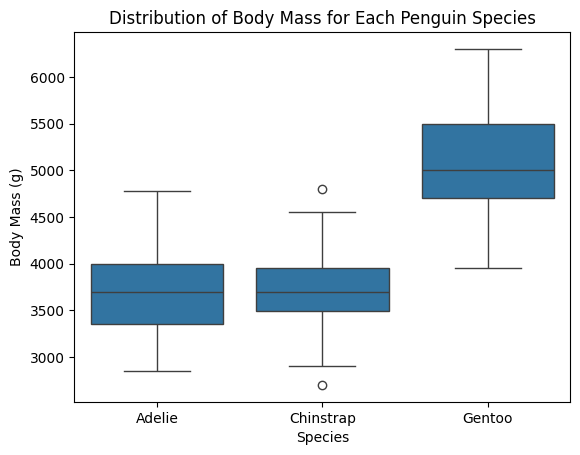

In [28]:
sns.boxplot(x=penguins['species'],y=penguins['body_mass_g'])
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.title("Distribution of Body Mass for Each Penguin Species")
plt.show()

# **7. Checking for Missing Values**

In [151]:
penguins.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,11


# **8. Correlation Between Bill Length and Body Mass**

In [38]:
penguins.corr(numeric_only=True)[['bill_length_mm','body_mass_g']]

,bill_length_mm,body_mass_g
bill_length_mm,1.000000,0.595110
bill_depth_mm,-0.235053,-0.471916
flipper_length_mm,0.656181,0.871202
body_mass_g,0.595110,1.000000


<Axes: >

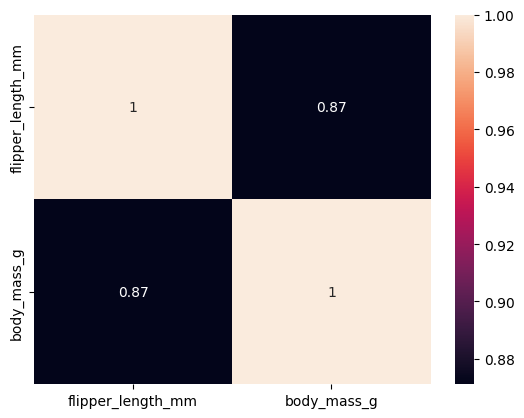

In [42]:
sns.heatmap(penguins[['flipper_length_mm','body_mass_g']].corr(),annot=True)

# **9. Heaviest Penguins Based on Island**

In [51]:
penguins[['island','body_mass_g']].groupby('island',as_index=False)['body_mass_g'].mean().sort_values(by='body_mass_g',ascending=False).iloc[0]

,0
island,Biscoe
body_mass_g,4716.017964


In [52]:
penguins.groupby('island', as_index=False)['body_mass_g'].mean().sort_values(by='body_mass_g', ascending=False).iloc[0]

,0
island,Biscoe
body_mass_g,4716.017964


# **10. Sex with the Highest Average Flipper Length**

In [53]:
penguins.groupby('sex',as_index=False)['flipper_length_mm'].mean().sort_values(by='flipper_length_mm',ascending=False)

,sex,flipper_length_mm
1,Male,204.505952
0,Female,197.363636


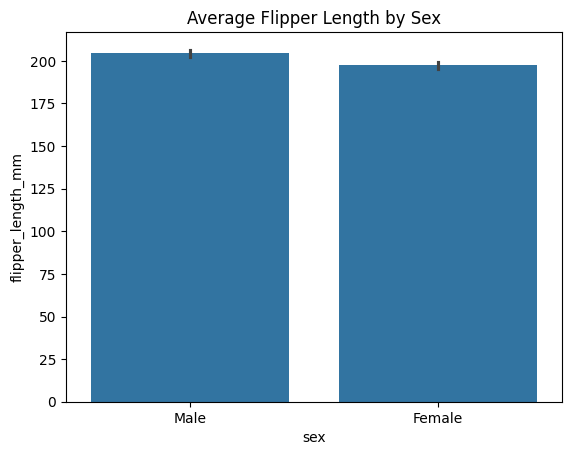

In [54]:
sns.barplot(x='sex',y='flipper_length_mm',data=penguins,estimator=np.mean)
plt.title("Average Flipper Length by Sex")
plt.show()

# **11. Most Common Species in the Dataset**

In [76]:
penguins['species'].value_counts().idxmax()

'Adelie'

In [75]:
penguins.groupby('species',as_index=False).count().sort_values('island',ascending=False).iloc[0]

,0
species,Adelie
island,152
bill_length_mm,151
bill_depth_mm,151
flipper_length_mm,151
body_mass_g,151
sex,146


# **12. Scatter Plot: Bill Length vs. Bill Depth by Species**

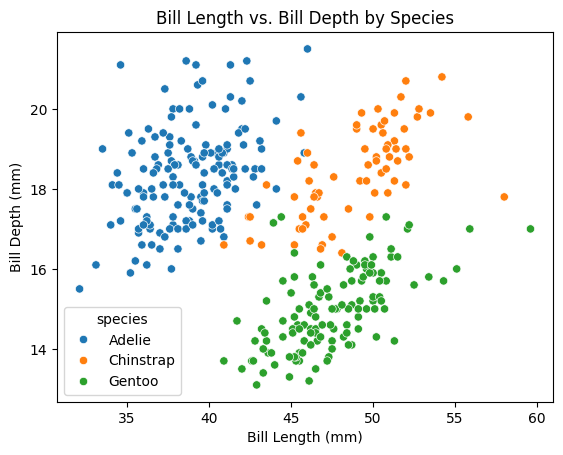

In [152]:
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguins, hue='species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Bill Length vs. Bill Depth by Species')
plt.show()


# **13. Linear Regression: Predicting Body Mass from Flipper Length**

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score

In [153]:
penguins.fillna(penguins.mean(numeric_only=True),inplace=True)

In [117]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [118]:
X=penguins.iloc[:,4:5]
y=penguins.iloc[:,-2]

In [119]:
X

,flipper_length_mm
0,181.000000
1,186.000000
2,195.000000
3,200.915205
4,193.000000
...,...
339,200.915205
340,215.000000
341,222.000000
342,212.000000


In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [121]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [122]:
X_train

,flipper_length_mm
31,178.0
245,215.0
277,220.0
165,201.0
250,222.0
...,...
188,195.0
71,190.0
106,199.0
270,210.0


In [123]:
y_train

,body_mass_g
31,3900.0
245,5100.0
277,5000.0
165,4050.0
250,5250.0
...,...
188,3850.0
71,3900.0
106,3750.0
270,4850.0


In [124]:
model=LinearRegression()

In [125]:
model.fit(X,y)

LinearRegression()

In [128]:
y_pred=model.predict(X_test)

In [130]:
print("Accuracy : ",r2_score(y_test,y_pred))

Accuracy :  0.7480915772327947


In [142]:
model.score(X_test,y_test)

0.7480915772327947

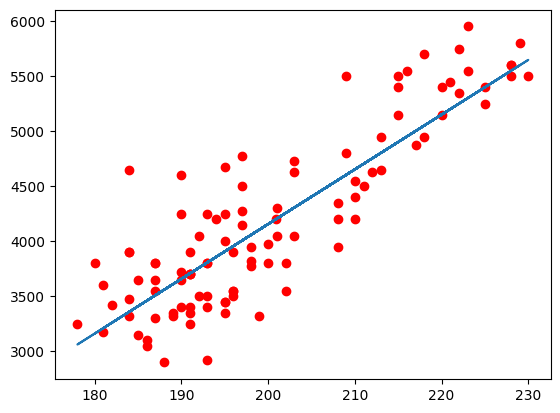

In [154]:
plt.scatter(x=X_test,y=y_test,color='r')
plt.plot(X_test,y_pred)